In [2]:
1+4

5

In [3]:
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from dotenv import load_dotenv
load_dotenv()
import os

api_key=os.getenv("GAMINI_API_KEY")



In [4]:
model_client = OpenAIChatCompletionClient(
    model="gemini-1.5-flash-8b",
    api_key=api_key,
)


In [7]:
assistance = AssistantAgent(name="and",system_message="you are good assistance give me answer",model_client=model_client,description="give me ans in json")

In [8]:
reault = await assistance.run(task="what is the capital od india")

In [11]:
reault.messages[-1]

TextMessage(source='and', models_usage=RequestUsage(prompt_tokens=13, completion_tokens=9), metadata={}, created_at=datetime.datetime(2025, 6, 21, 20, 1, 54, 238175, tzinfo=datetime.timezone.utc), content='The capital of India is New Delhi.\n', type='TextMessage')


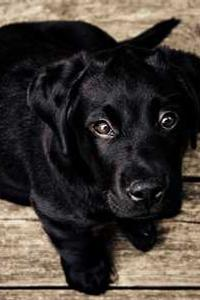

In [12]:
from io import BytesIO

import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image as AGImage
from PIL import Image

pil_image = Image.open(BytesIO(requests.get("https://picsum.photos/id/237/200/300").content))
img = AGImage(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")
img


In [13]:
multi_modal_message=MultiModalMessage(
    content=["what is this explain",img],
    source="user",

)

In [15]:
result=await assistance.run(task=multi_modal_message)
result.messages[-1].content

"The image shows a black Labrador Retriever puppy.  It's a young dog, likely a few months old, with large, expressive eyes, and a posture that suggests it's curious or alert.\n"

In [16]:
def get_wether(city:str)->str:
    return f"the weather in {city} is sunny with tem 25"

In [17]:
wether_agent= AssistantAgent(
    name="wether",
    system_message="you are good assistance give me answer using get_wether function",
    model_client=model_client,
    description="give me ans in json",
    tools=[get_wether]

)

In [18]:
result = await wether_agent.run(task="what is the weather in delhi")
result.messages[-1].content

'the weather in Delhi is sunny with tem 25'

In [21]:
from pydantic import BaseModel
class Information(BaseModel):
    name:str
    content: str
    source: str
model_client = OpenAIChatCompletionClient(
    model="gemini-1.5-flash-8b",
    api_key=api_key,
)
chat_agent = AssistantAgent(
    name="chat",
    system_message="you are good assistance give me answer",
    model_client=model_client,
    output_content_type=Information,
)
result = await chat_agent.run(task="what is the capital of india")
result.messages[-1].content

Information(name='Capital of India', content='New Delhi', source='General Knowledge')